#### ADS 509
#### Assignment 6
#### Abby Tan
#### GitHub Link: https://github.com/Abby-Tan/ADS509_Assignment_6

# ADS 509 Sentiment Assignment

This notebook holds the Sentiment Assignment for Module 6 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In a previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we apply sentiment analysis to those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
# Add any additional import statements you need here
import emoji
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from string import punctuation

from nltk.corpus import stopwords

sw = stopwords.words("english")

In [3]:
# change `data_location` to the location of the folder on your machine.
data_location = "C:/Users/abby0/OneDrive/Documents/GitHub/ADS509_Assignment_6/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

positive_words_file = "positive-words.txt"
negative_words_file = "negative-words.txt"
tidy_text_file = "tidytext_sentiments.txt"

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A Pandas data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [4]:
# Read in the lyrics data
artist_folders = os.listdir("lyrics/")
artist_folders = [f for f in artist_folders if os.path.isdir("lyrics/" + f)]

In [5]:
artists = []
songs = []
lyrics = []

In [6]:
for artist in artist_folders:
    artist_files = os.listdir("lyrics/" + artist)
    artist_files = [f for f in artist_files if 'txt' in f or 'csv' in f or 'tsv' in f]
    for f_name in artist_files:
        with open("lyrics/" + artist + "/" + f_name) as infile:
            artists.append(artist)
            songs.append(f_name)
            lyrics.append(infile.read())

In [7]:
df_lyrics = pd.DataFrame({'artists':artists,
                          'songs'  :songs,
                          'lyrics' :lyrics })

In [8]:
df_lyrics['songs'] = df_lyrics['songs'].str.replace('joji_','')
df_lyrics['songs'] = df_lyrics['songs'].str.replace('postmalone_','')
df_lyrics['songs'] = df_lyrics['songs'].str.replace('.txt','')
df_lyrics['songs'] = df_lyrics['songs'].str.replace('_',' ')

In [9]:
df_lyrics.head(3)

,artists,songs,lyrics
0,Joji,amazonian pet,"amazonian pet\n\nI'm an old man rich, amazonia..."
1,Joji,attention,"attention\n\nGirl, would it kill you just to t..."
2,Joji,bitter fuck,bitter fuck\n\nI find it hard to be myself\nI ...


In [10]:
# Read in the twitter data

In [11]:
PostMalone_df = pd.read_csv(data_location + twitter_folder + 'PostMalone_follower_data.txt', sep='\t')
PostMalone_df['artists'] = 'PostMalone'
PostMalone_df = PostMalone_df[['artists','description']]

In [12]:
Joji_df = pd.read_csv(data_location + twitter_folder + 'sushitrash_follower_data.txt', sep='\t')
Joji_df['artists'] = 'Joji'
Joji_df = Joji_df[['artists','description']]

In [13]:
df_twitter = pd.concat([PostMalone_df, Joji_df])

In [14]:
df_twitter.head(3)

,artists,description
0,PostMalone,she/her
1,PostMalone,She/Her 🇬🇧🇪🇺
2,PostMalone,a math dracula • associate software developer ...


In [15]:
# Read in the positive and negative words and the
# tidytext sentiment. Store these so that the positive
# words are associated with a score of +1 and negative words
# are associated with a score of -1. You can use a dataframe or a 
# dictionary for this.

pos_words = pd.read_csv(data_location + 'positive-words.txt', sep='\t', encoding='latin-1')
neg_words = pd.read_csv(data_location + 'negative-words.txt', sep='\t', encoding='latin-1')
tidy_sen = pd.read_csv(data_location + 'tidytext_sentiments.txt', sep='\t', encoding='latin-1')

In [16]:
# positive and negative words
pos_words = pos_words[33:]
neg_words = neg_words[33:]

pos_words['score'] = 1
neg_words['score'] = -1

pos_words.columns = ['word','score']
neg_words.columns = ['word','score']

In [17]:
# tidy sentiments
tidy_sen['score'] = np.where(tidy_sen['sentiment'] == 'positive', 1, -1)
tidy_sen = tidy_sen[['word','score']]

In [18]:
# merge
df_sen = pd.concat([pos_words, neg_words, tidy_sen], axis=0)
df_sen = df_sen.drop_duplicates().reset_index(drop=True)
df_sen.shape

(11539, 2)

In [19]:
df_sen.head(3)

,word,score
0,a+,1
1,abound,1
2,abounds,1


In [20]:
# convert to dictionary
sen_word = df_sen['word'].to_list()
sen_score = df_sen['score'].to_list()
word_dict = dict(zip(sen_word, sen_score))

## Sentiment Analysis on Songs

In this section, score the sentiment for all the songs for both artists in your data set. Score the sentiment by manually calculating the sentiment using the combined lexicons provided in this repository. 

After you have calculated these sentiments, answer the questions at the end of this section.


In [21]:
# your code here

In [22]:
# sentiment score

def sen_score(text):
    sentiment_score = 0
    for word in text:
        if word in word_dict: 
            sentiment_score += word_dict[word]
    return sentiment_score / len(text)

# Reference
# Albrecht, J., Ramachandran, S., & Winkler, C. (2020, December 29). 
# Blueprints for Text Analytics Using Python: Machine Learning-Based Solutions for Common Real World (NLP) Applications (1st ed.). O’Reilly Media.
# Page 301

In [23]:
# data prep pipeline

punctuation = set(punctuation)
whitespace_pattern = re.compile(r"\s+")
sw = stopwords.words("english")

def remove_punctuation(text, punct_set=punctuation) :
    return("".join([ch for ch in text if ch not in punct_set]))

sw = set([remove_punctuation(w) for w in sw])
def remove_stop(tokens) :
    return([t for t in tokens if t.lower() not in sw])

def tokenize(text) :
    return([t for t in whitespace_pattern.split(text) if t])

def prepare(text, pipeline) :
    tokens = str(text)
    for transform in pipeline :
        tokens = transform(tokens)
    return(tokens)

# Reference from module 3 assignment

In [24]:
my_pipeline = [str.lower, remove_punctuation, tokenize, remove_stop]

##### Lyrics data

In [25]:
df_lyrics["tokens"] = df_lyrics["lyrics"].apply(prepare,pipeline=my_pipeline)

In [26]:
df_lyrics['lyrics_score'] = df_lyrics['tokens'].apply(sen_score)
df_lyrics.head(3)

,artists,songs,lyrics,tokens,lyrics_score
0,Joji,amazonian pet,"amazonian pet\n\nI'm an old man rich, amazonia...","[amazonian, pet, im, old, man, rich, amazonian...",-0.073684
1,Joji,attention,"attention\n\nGirl, would it kill you just to t...","[attention, girl, would, kill, throw, little, ...",-0.033708
2,Joji,bitter fuck,bitter fuck\n\nI find it hard to be myself\nI ...,"[bitter, fuck, find, hard, shed, skin, everybo...",-0.538462


---

### Questions

#### Q1: Overall, which artist has the higher average sentiment per song? 

A: PostMalone has the higher average sentiment per song.

In [27]:
df_lyrics.groupby(['artists'])['lyrics_score'].mean()

artists
Joji         -0.031590
PostMalone   -0.013446
Name: lyrics_score, dtype: float64

#### Q2: For your first artist, what songs have the highest and lowest sentiments? Print those songs to the screen.

A: The following 2 songs have the highest and lowest sentiments for the first artist (Joji)

In [28]:
fst_artist = df_lyrics[df_lyrics['artists'] == 'Joji']

In [29]:
# highest sentiment
print('The song has highest sentiment:')
fst_artist[fst_artist['lyrics_score'] == fst_artist['lyrics_score'].max()][['artists','songs','lyrics_score']]

The song has highest sentiment:


,artists,songs,lyrics_score
9,Joji,no fun,0.233766


In [30]:
# lowest sentiment
print('The song has lowest sentiment:')
fst_artist[fst_artist['lyrics_score'] == fst_artist['lyrics_score'].min()][['artists','songs','lyrics_score']]

The song has lowest sentiment:


,artists,songs,lyrics_score
2,Joji,bitter fuck,-0.538462


#### Q3: For your second artist, what songs have the highest and lowest sentiments? Print those songs to the screen.

A: The following 2 songs have the highest and lowest sentiments for the second artist (PostMalone)

In [31]:
scd_artist = df_lyrics[df_lyrics['artists'] == 'PostMalone']

In [32]:
# highest sentiment
print('The song has highest sentiment:')
scd_artist[scd_artist['lyrics_score'] == scd_artist['lyrics_score'].max()][['artists','songs','lyrics_score']]

The song has highest sentiment:


,artists,songs,lyrics_score
37,PostMalone,oh god,0.204301


In [33]:
# lowest sentiment
print('The song has lowest sentiment:')
scd_artist[scd_artist['lyrics_score'] == scd_artist['lyrics_score'].min()][['artists','songs','lyrics_score']]

The song has lowest sentiment:


,artists,songs,lyrics_score
27,PostMalone,git wit u,-0.150538


#### Q4: Plot the distributions of the sentiment scores for both artists. You can use seaborn to plot densities or plot histograms in matplotlib.

artists
Joji          AxesSubplot(0.125,0.125;0.775x0.755)
PostMalone    AxesSubplot(0.125,0.125;0.775x0.755)
Name: lyrics_score, dtype: object

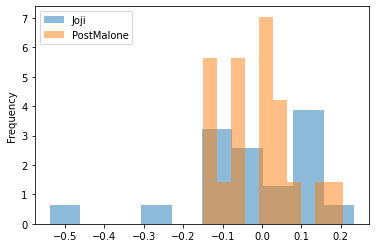

In [34]:
df_lyrics.groupby('artists')['lyrics_score'].plot(kind="hist",density=True,alpha=0.5,legend=True)

## Sentiment Analysis on Twitter Descriptions

In this section, define two sets of emojis you designate as positive and negative. Make sure to have at least 10 emojis per set. You can learn about the most popular emojis on Twitter at [the emojitracker](https://emojitracker.com/). 

Associate your positive emojis with a score of +1, negative with -1. Score the average sentiment of your two artists based on the Twitter descriptions of their followers. The average sentiment can just be the total score divided by number of followers. 

---

In [35]:
# your code here

#### Emoji sentiment data obtained from Kaggle

https://www.kaggle.com/datasets/thomasseleck/emoji-sentiment-data

##### Dictionary for Q1 - word and emoji combine

In [36]:
df_emoji_sen = pd.read_csv(r'C:\Users\abby0\OneDrive\Documents\GitHub\ADS509_Assignment_6\Emoji_Sentiment_Data_v1.0.csv')
df_emoji_sen.head(3)

,Emoji,Unicode codepoint,Occurrences,Position,Negative,Neutral,Positive,Unicode name,Unicode block
0,😂,0x1f602,14622,0.805101,3614,4163,6845,FACE WITH TEARS OF JOY,Emoticons
1,❤,0x2764,8050,0.746943,355,1334,6361,HEAVY BLACK HEART,Dingbats
2,♥,0x2665,7144,0.753806,252,1942,4950,BLACK HEART SUIT,Miscellaneous Symbols


In [37]:
df_emoji_sen['sentiment'] = df_emoji_sen[['Negative','Neutral','Positive']].idxmax(axis=1)
df_emoji_sen = df_emoji_sen[df_emoji_sen['sentiment'] != 'Neutral']

In [38]:
# get 100 positive emoji
pos_emoji = df_emoji_sen[df_emoji_sen['sentiment'] == 'Positive']
pos_emoji = pos_emoji.sort_values('Occurrences', ascending=False).head(100)[['Emoji']]
pos_emoji['score'] = 1
pos_emoji.columns = ['word', 'score']
pos_emoji.head(3)

,word,score
0,😂,1
1,❤,1
2,♥,1


In [39]:
# get 100 negative emoji
neg_emoji = df_emoji_sen[df_emoji_sen['sentiment'] == 'Negative']
neg_emoji = neg_emoji.sort_values('Occurrences', ascending=False).head(100)[['Emoji']]
neg_emoji['score'] = -1
neg_emoji.columns = ['word', 'score']
neg_emoji.head(3)

,word,score
4,😭,-1
14,😩,-1
23,😒,-1


In [40]:
# combine sentiment for emoji and word
df_sen_w_emoji = pd.concat([pos_emoji, neg_emoji, df_sen], axis=0)

In [41]:
# convert to dictionary
sen_word = df_sen_w_emoji['word'].to_list()
sen_score = df_sen_w_emoji['score'].to_list()
word_dict = dict(zip(sen_word, sen_score))

In [42]:
# sentiment score

def sen_score(text):
    sentiment_score = 0
    for word in text:
        if word in word_dict: 
            sentiment_score += word_dict[word]
    return sentiment_score / (len(text) or not len(text))

##### Dictionary for Q2 - emoji only

In [43]:
# emoji only sentiment
sen_emoji = pd.concat([pos_emoji, neg_emoji], axis=0)

pos_emoji_list = pos_emoji['word'].tolist()
neg_emoji_list = neg_emoji['word'].tolist()

---

#### Twitter data

##### Data clean for Q1

In [44]:
df_twitter["tokens"] = df_twitter["description"].apply(prepare,pipeline=my_pipeline)

In [45]:
df_twitter['twitter_score'] = df_twitter['tokens'].apply(sen_score)
df_twitter.head(3)

,artists,description,tokens,twitter_score
0,PostMalone,she/her,[sheher],0.0
1,PostMalone,She/Her 🇬🇧🇪🇺,"[sheher, 🇬🇧🇪🇺]",0.0
2,PostMalone,a math dracula • associate software developer ...,"[math, dracula, •, associate, software, develo...",0.1


##### Data clean for Q2

In [46]:
def is_emoji(s):
    return(emoji.is_emoji(s))

In [47]:
# convert descrption to list

    # PostMalone
PostMalone_twitter = df_twitter[df_twitter['artists'] == 'PostMalone']
PostMalone_desc_list = PostMalone_twitter['description'].tolist()

    # Joji
Joji_twitter = df_twitter[df_twitter['artists'] == 'Joji']
Joji_desc_list = Joji_twitter['description'].tolist()

In [48]:
# emoji only lists

    # PostMalone
postmalone_emoji = []
for text in PostMalone_desc_list:
    if is_emoji(text):
        postmalone_emoji.append(text)

    # Joji
joji_emoji = []
for text in Joji_desc_list:
    if is_emoji(text):
        joji_emoji.append(text)

In [49]:
# positive and negative emoji lists

    # PostMalone
postmalone_pos_emoji = [i for i in postmalone_emoji if i in pos_emoji_list]
postmalone_neg_emoji = [i for i in postmalone_emoji if i in neg_emoji_list]

    # Joji
joji_pos_emoji = [i for i in joji_emoji if i in pos_emoji_list]
joji_neg_emoji = [i for i in joji_emoji if i in neg_emoji_list]

In [50]:
print(Counter(postmalone_pos_emoji).most_common(1))
print(Counter(postmalone_neg_emoji).most_common(1))
print(Counter(joji_pos_emoji).most_common(1))
print(Counter(joji_neg_emoji).most_common(1))

[('😎', 10)]
[('💔', 3)]
[('❤', 7)]
[('➰', 1)]


---

#### Q1: What is the average sentiment of your two artists?

A: Joji has average sentiment of 0.032379 and PostMalone has 0.059090

In [51]:
df_twitter.groupby(['artists'])['twitter_score'].mean()

artists
Joji          0.032379
PostMalone    0.059090
Name: twitter_score, dtype: float64

#### Q2: Which positive emoji is the most popular for each artist? Which negative emoji? 

In [52]:
print('Most popular positive emoji for PostMalone is:')
Counter(postmalone_pos_emoji).most_common(1)[0][0]

Most popular positive emoji for PostMalone is:


'😎'

In [53]:
print('Most popular negative emoji for PostMalone is:')
Counter(postmalone_neg_emoji).most_common(1)[0][0]

Most popular negative emoji for PostMalone is:


'💔'

In [54]:
print('Most popular positive emoji for Joji is:')
Counter(joji_pos_emoji).most_common(1)[0][0]

Most popular positive emoji for Joji is:


'❤'

In [55]:
print('Most popular negative emoji for Joji is:')
Counter(joji_neg_emoji).most_common(1)[0][0]

Most popular negative emoji for Joji is:


'➰'

---